## Purpose:

#### Generate report style infographic --

This notebook is intended to be a 'summary' report guide. It organizes the elements present in preceding notebooks and generates summary maps and text

In [1]:
import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [2]:
# delte this is temporary--
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import calculate_histogram_data


from src.utils.universal_functions.setup.generate_base_file import give_primary_frame

from src.utils.functions_for_return_periods.insurance_products_for_RP import insurance_files

#Functions for graphics:
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import clean_info_dataframe, query_and_sort_annual_table, provide_values_at_input_return_periods, retrieve_geodataframe, define_year_to_map, query_geodataframe

from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_table import image_save_returnperiodtable
from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_lineplot import plot_histogram_with_lineplot_4
from src.utils.functions_for_graphics.individual_graphics.image_annual_summary_table import plot_and_colorize_annual_table
from src.utils.functions_for_graphics.individual_graphics.image_map_for_Ei import image_save_map_E_i

#Mapping structure:
from src.utils.functions_for_graphics.layout_formats.event_cat_rp import map_event_cat_rp
from src.utils.functions_for_graphics.layout_formats.summary_of_top_years import map_top_years
#from src.utils.functions_for_graphics.layout_formats.Layout_single_method_option1 import mapped_option1


#functions for all methods
from src.utils.universal_functions.FAO_table_formatting.generate_output_tables import generate_and_give_info_dataframe



The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The curren

In [3]:
data = give_primary_frame('Fatalities_fao_pgm', 'cm_properties', 1988, 2021)

100%|██████████| 40.0M/40.0M [00:02<00:00, 19.6MB/s]


Queryset Fatalities_fao_pgm read successfully 
Queryset cm_properties read successfully 


/Users/gbenz/miniforge3/envs/viewser/lib/python3.11/site-packages/ingester3/scratch.py:31: UserWarning: No database connection! Will try to use cache for read-only ops as much as I can
  warnings.warn("No database connection! Will try to use cache for read-only ops as much as I can")


['month_id', 'pg_id', 'country_name', 'C_start_year', 'C_end_year', 'pop_gpw_sum', 'ged_sb', 'ged_ns', 'ged_os', 'year', 'fatalities_sum', 'country_id']


In [4]:
data_working_copy = data

### Provides the primary dataframes defined by the FAO request for information

#### Country Year 

### Select from:

#### 'standard' or 'aggregation' or 'smoothing'

In [5]:
method = 'standard' # 'standard' or 'aggregation' or 'smoothing'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'smoothing':
    value_field = 'perca_Mean'
else:
    value_field = 'percapita_100k'

### Select from:

#### 'Event year' or 'Country year'

In [6]:
return_period = 'Country year' # 'Event year' or 'Country year'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if return_period == 'Event year':
    insurance_attribute = 'return period' # This should eventually be changed and cleaned up
if return_period == 'Country year':
    insurance_attribute = 'Return Period' # This should eventually be changed and cleaned up

In [7]:
country = 'Israel'

### Select from:

#### integer value 2-10

A value error will be raised to prompt a new input if the selection does match specifications required for the intended method

In [8]:
aggregation = '3'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'aggregation' and int(aggregation) <= 1:
    raise ValueError("Aggregation value must be greater than 1 for the 'aggregation' method.")

if method == 'standard' or method == 'smoothing':
    aggregation = '1'
print(aggregation)

1


In [9]:
sort_annual_report_by = 'first_value' 

if method == 'smoothing':
    sort_annual_report_by = 'first_value' # 'first_value' or 'average_value' /// or year but this is not built in yet

print(sort_annual_report_by)

first_value


In [10]:

conflict_profile, x, y, z = insurance_files(data_working_copy, country, method, return_period, aggregation_unit=aggregation)

print(x.head(10))
print('y dataframe')
print(y)
print('z dataframe:')
print(z)

max_year = max(x['year'])
min_year = min(x['year'])

print(max_year)
print(min_year)


   c_id country_name  C_start_year  C_end_year     0
0   218       Israel          1979        2050  5760
the length of country_ids for the selected country is: 1
printing he country and year dictionary:
{218: (1979, 2050)}
Index where percapita_100k equals 1: 72.5: 1.0
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Israel/Standard/Country Year/FAO tables' already exists.
saving annual_summary table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Israel/Standard/Country Year/FAO tables/Israel annual summary.csv
saving insurance table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Israel/Standard/Country Year/FAO tables/Israel insurance table.csv
saving main dataframe table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Israel/Standard/Country Year/FAO tables/Israel main dataframe.csv
    pg_id  year  fatalities_sum   pop_gpw_sum  percapita_100k
0  173230  1989  

In [11]:
info_df, color_scheme = generate_and_give_info_dataframe(z, return_period, value_field, insurance_attribute)
print(info_df)

   Return Period          Range    Color               Label
0              0        0 - 8.1  #d5dbdb  Below 1 in 10 year
1             10     8.1 - 21.3  #377eb8        1 in 10 year
2             20    21.3 - 41.5  #e6ab02        1 in 20 year
3             50    41.5 - 54.4  #762a83        1 in 50 year
4            100  54.4 - 100000  #b2182b       1 in 100 year


#### Provide examples of when to drop and when not to drop RP values:

Do not drop when the maximum value of RP 0 is not zero:
   Return Period          Range    Color               Label
0              0        0 - 8.1  #d5dbdb  Below 1 in 10 year
1             10     8.1 - 21.3  #377eb8        1 in 10 year
2             20    21.3 - 41.5  #e6ab02        1 in 20 year
3             50    41.5 - 54.4  #762a83        1 in 50 year
4            100  54.4 - 100000  #b2182b       1 in 100 year

In [12]:
#define the return period that should be dropped (if any) DEFUALT: 0

#--------------------------------------------------------------------------------
#     This is what should be changed     
#--------------------------------------------------------------------------------
rp_to_drop=[]
#--------------------------------------------------------------------------------
cleaned_labels, cleaned_thresholds, filtered_info = clean_info_dataframe(info_df,rp_to_drop)


print('Reference the Info Dataframe:')
print(filtered_info)
print()
print(f'Here are the labels to be referenced: {cleaned_labels}')
print(f'Here are the corresponding thresholds to be referenced: {cleaned_thresholds}')

Reference the Info Dataframe:
   Return Period          Range    Color               Label
0              0        0 - 8.1  #d5dbdb  Below 1 in 10 year
1             10     8.1 - 21.3  #377eb8        1 in 10 year
2             20    21.3 - 41.5  #e6ab02        1 in 20 year
3             50    41.5 - 54.4  #762a83        1 in 50 year
4            100  54.4 - 100000  #b2182b       1 in 100 year

Here are the labels to be referenced: ['Below 1 in 10 year', '1 in 10 year', '1 in 20 year', '1 in 50 year', '1 in 100 year']
Here are the corresponding thresholds to be referenced: [8.1, 21.3, 41.5, 54.4]


Here changes are being made locally to the function: lineplot_frominfo

#### Produces Graphics and saves to folder which can be referenced by next coding steps:

## NOTE:
y_rows --> is the number of rows in 'y'. this is a dataframe that contains 1 row for each year.

need to make a change so that 

indices = sorted_annual_table.index[sorted_annual_table['year'].isin(evaluate_specific_years)].tolist()

is referencing the original index from the input specified years.


  percentile  percapita_100k  occurrence return period payout rate
0       72.5             1.0          85           3.6   undefined
1         90             8.1          24          10.0         30%
2         95            21.3          14          20.0         55%
3         98            41.5           5          50.0         75%
4         99            54.4           4         100.0        100%
5        max           211.5           1            --          --
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/table_png/percentile and payout table' already exists.


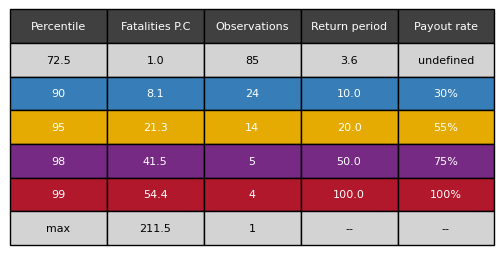

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/1x1/table_png' already exists.


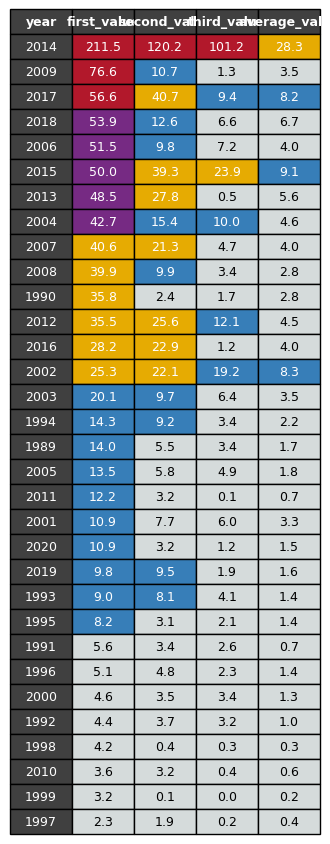

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/plot_png' already exists.


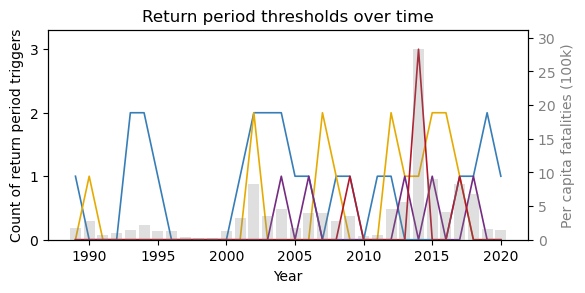

map for: 0


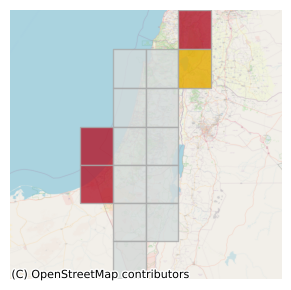

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 0 in 2014.0  with dimensions 3.50x3.50.png
map for: 1


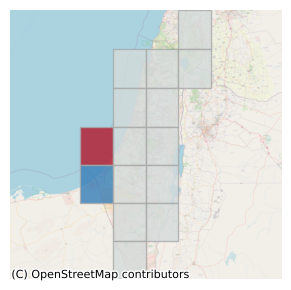

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 1 in 2009.0  with dimensions 3.50x3.50.png
map for: 2


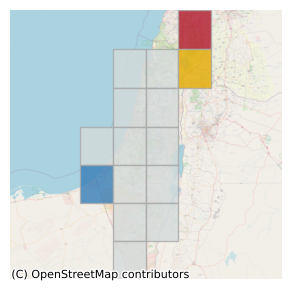

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 2 in 2017.0  with dimensions 3.50x3.50.png
map for: 3


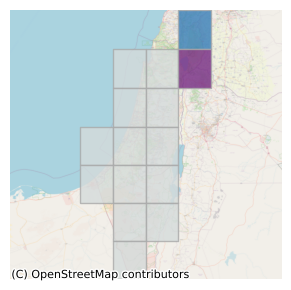

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 3 in 2018.0  with dimensions 3.50x3.50.png
map for: 4


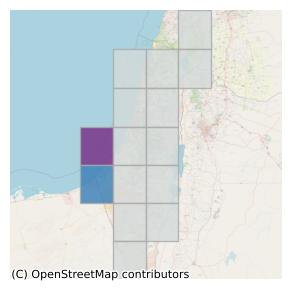

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 4 in 2006.0  with dimensions 3.50x3.50.png
map for: 5


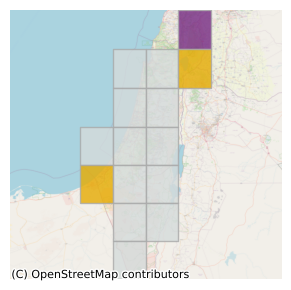

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 5 in 2015.0  with dimensions 3.50x3.50.png
map for: 6


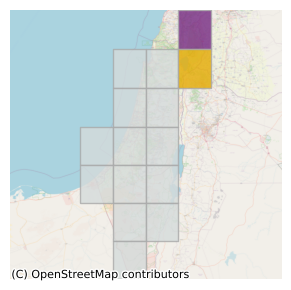

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 6 in 2013.0  with dimensions 3.50x3.50.png
map for: 7


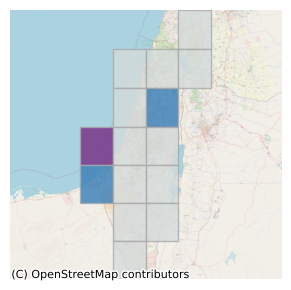

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 7 in 2004.0  with dimensions 3.50x3.50.png
map for: 8


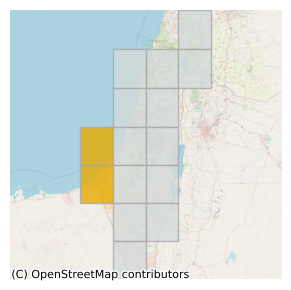

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 8 in 2007.0  with dimensions 3.50x3.50.png
map for: 9


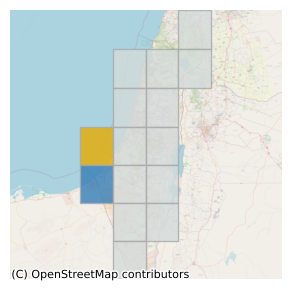

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 9 in 2008.0  with dimensions 3.50x3.50.png
map for: 20


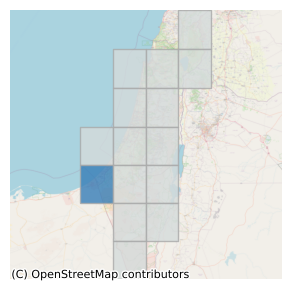

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 20 in 2020.0  with dimensions 3.50x3.50.png
map for: 26


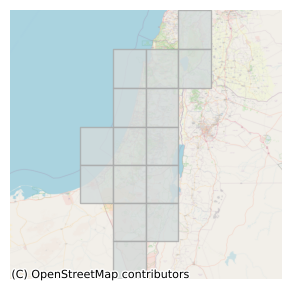

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 26 in 2000.0  with dimensions 3.50x3.50.png
map for: 29


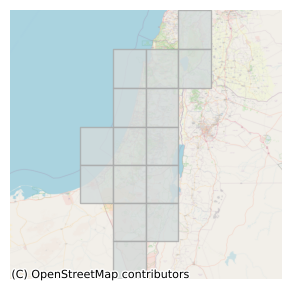

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/Israel conflict year 29 in 2010.0  with dimensions 3.50x3.50.png


In [13]:
#produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
y_rows = y.shape[0]
#make the insurance table columns lowercase to keep in line with JPR standards:
z.columns = z.columns.str.lower()
print(z)
#-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(y, field_to_sort=sort_annual_report_by, number_of_rows=y_rows)
sorted_annual_table.iloc[:, 1:] = sorted_annual_table.iloc[:, 1:].round(1)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)

filtered_colors = filtered_info['Color'].tolist()
lineplot_colors = filtered_colors[1:]
image_save_returnperiodtable(z, color_scheme, insurance_attribute, country, method, return_period, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
plot_and_colorize_annual_table(sorted_annual_table, filtered_info, country, method, return_period, aggregation=aggregation, figure_height=5.5, figure_width=4.0)
plot_histogram_with_lineplot_4(x, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0)


gdf = retrieve_geodataframe(aggregation)
for annual_event in range(min(10, y_rows)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(sorted_annual_table, annual_event)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=annual_event)

evaluate_specific_years = [2000, 2010, 2020]
indices = sorted_annual_table.index[sorted_annual_table['year'].isin(evaluate_specific_years)].tolist()


for specific_year in indices:
        print(f'map for: {specific_year}')
        year_to_eval = define_year_to_map(sorted_annual_table, specific_year)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=specific_year)

        

### map_event_cat_rp:

Gives Top 3 years and 3 select decadal years

In [14]:
map_event_cat_rp(country, method, return_period, min_year, max_year, aggregation)

/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/1x1/table_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/table_png/percentile and payout table/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/plot_png/
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/event_cat_rd' already exists.
located map rank1: Israel conflict year 0 in 2014.0  with dimensions 3.50x3.50.png
2014
located map rank 2: Israel conflict year 1 in 2009.0  with dimensions 3.50x3.50.png
2009
located map rank 3: Israel conflict year 2 in 2017.0  with dimensions 3.50x3.50.png
2017
Israel conflict year 29 in 2010.0  with dimensions 3.50x3.50.png
Israel conflict year 20 in 2020.0  with dimensions 3.50x3.50.png
Israel conflict year 26 in 2000.0  with dimensions 

In [16]:
summary_text = 'summary text'

In [17]:
map_top_years(country, method, return_period, summary_text, aggregation)

/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/table_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/table_png/percentile and payout table/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Israel/standard/Country year/plot_png/
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/Israel' already exists.
Israel conflict year 0 in 2014.0  with dimensions 3.50x3.50.png
Israel conflict year 1 in 2009.0  with dimensions 3.50x3.50.png
Israel conflict year 2 in 2017.0  with dimensions 3.50x3.50.png
Israel conflict year 3 in 2018.0  with dimensions 3.50x3.50.png
Israel conflict year 4 in 2006.0  with dimensions 3.50x3.50.png
Israel conflict year 5 in 2015.0  with dimensions 3.50x3.50.png
Israel conflict year 6 in 2013.0  with dimensions 3.50x3.50.png
Israel co

In [ ]:
# Define your variables
import pandas as pd
country  # Example value, replace with actual country

max_year = max(y['year'])
min_year = min(y['year'])
print(f'The max year in the dataframe (max_year): {max_year}')
print(f'The min year in the dataframe (max_year): {min_year}')

year_range = f"{min_year}-{max_year}"  # Example value, replace with actual year range
#total_conflict = sum(subset_to_country['fatalities_sum'])  

total_events = len(x)
pg_events = len(pd.unique(x['pg_id']))
total_years = len(pd.unique(x['year']))

#method = "Smoothing"  # Example value, replace with actual method used
#return_period_definition = "Cell-year"  # Example value, replace with actual definition

year_of_greatest_conflict = sorted_annual_table['year'].iloc[0]

row_with_50 = z.loc[z['Return Period'] == 50.0]
row_with_100 = z.loc[z['Return Period'] == 100.0]
row_with_max = z.loc[z['Return Period'] == 'Max']

#greatest_conflict_range = "2010-2020"  # Example value, replace with actual range
payout_rate_value50 = row_with_50[value_field].values[0]
payout_rate_value100 = row_with_100[value_field].values[0]

Occurrence_value50 = row_with_50['Occurrence'].values[0]
Occurrence_value100 = row_with_100['Occurrence'].values[0]
Occurrence_valueMax = row_with_max['Occurrence'].values[0]

total_occurence_over100year = Occurrence_value100 + Occurrence_valueMax

ged_sb_sum = conflict_profile['ged_sb']
ged_ns_sum = conflict_profile['ged_ns']
ged_os_sum = conflict_profile['ged_os']
fatalities_sum = conflict_profile['fatalities_sum']

summary_text = (
    f"During the observed period, a total of {total_events} PRIO-Grid years were analyzed in {country}, spanning from {year_range}. "
    f"Throughout this time range, the conflict profile consists of {ged_os_sum} fatalities from one-sided events, {ged_sb_sum} state-based, and {ged_ns_sum} non-state, producing a total of {fatalities_sum} events."
    f"The analysis employed the {method} method for evaluation. "
    f"The definition of return period applied is {return_period}. "
    f"The year with the highest average conflict was {year_of_greatest_conflict}."
    f"The thresholds for 1 in 50 and 1 in 100 year events were {payout_rate_value50} and {payout_rate_value100}, respectively. "
    f"Occurrences of 1 in 50 year events totaled {Occurrence_value50}, while there were {total_occurence_over100year} occurrences of 1 in 100 year events. "
)

Malawi

no per capita fatalities appear because there are only 2 maybe 3 event which puts any occurence above the 99.9% threshold. because the insurance table rounds o the .1 deceimal -- no fatalities are reports anywhere in the country because there are so few.